### EDA on Vessel Size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
ais_tracks_path = '../data/tracks_ais.csv'
radar_tracks_path = '../data/tracks_radar.csv'
radar_detections_path = '../data/detections_radar.csv'
tagged_detections_path = '../data/detections_tagged.csv'
tracks_tagged_path = '../data/tracks_tagged.csv'

ais_tracks = pd.read_csv(ais_tracks_path)
radar_tracks = pd.read_csv(radar_tracks_path)
radar_detections = pd.read_csv(radar_detections_path)
tagged_detections = pd.read_csv(tagged_detections_path)
tracks_tagged = pd.read_csv(tracks_tagged_path)

print("Length of ais_tracks:", len(ais_tracks))
print("Length of radar_tracks:", len(radar_tracks))
print("Length of radar_detections:", len(radar_detections))
print("Length of tagged_detections:", len(tagged_detections))
print("Length of tracks_tagged:", len(tracks_tagged))

Length of ais_tracks: 27416
Length of radar_tracks: 27416
Length of radar_detections: 7387790
Length of tagged_detections: 6756272
Length of tracks_tagged: 9013


In [39]:
ais_tracks['length'] = ais_tracks['dim_a'] + ais_tracks['dim_b']
ais_tracks['width'] = ais_tracks['dim_c'] + ais_tracks['dim_d']

#Filter only the AIS tracks with valid size information
ais_tracks_with_size = ais_tracks.dropna(subset=['width', 'length'])
length_width_filter = (ais_tracks['length'] > 0) & (ais_tracks['width'] > 0)
ais_tracks_with_size = ais_tracks_with_size[length_width_filter]
print(f'Total number of AIS tracks with size info: {len(ais_tracks_with_size)}')

Total number of AIS tracks with size info: 21979


/var/folders/jm/bv3tgs257hx9tx764_p9xq0w0000gn/T/ipykernel_34135/1675214715.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ais_tracks_with_size = ais_tracks_with_size[length_width_filter]


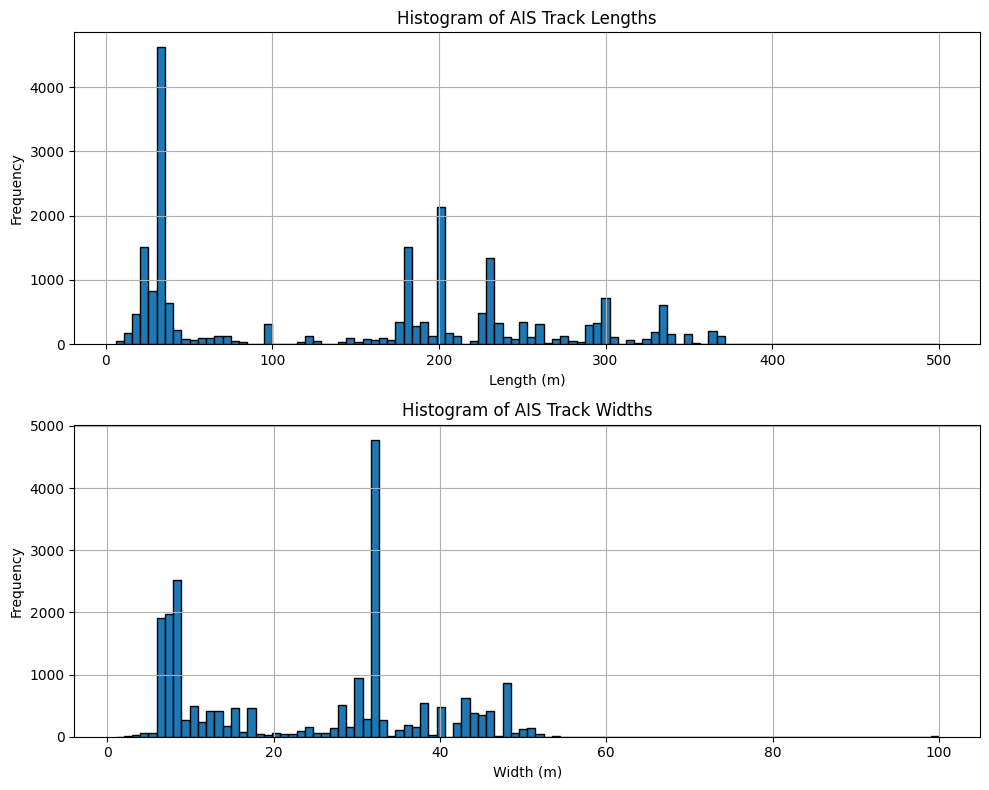

In [47]:
# Create a figure with two subplots
plt.figure(figsize=(10,8))

# Plot histogram for length
plt.subplot(2, 1, 1)
ais_tracks_with_size['length'].hist(bins=100, edgecolor='black')
plt.title('Histogram of AIS Track Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')

# Plot histogram for width
plt.subplot(2, 1, 2)
ais_tracks_with_size['width'].hist(bins=100, edgecolor='black')
plt.title('Histogram of AIS Track Widths')
plt.xlabel('Width (m)')
plt.ylabel('Frequency')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


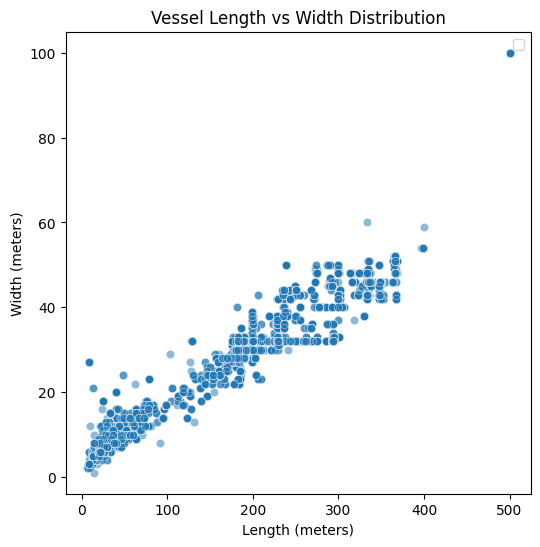

In [53]:

# Create the scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=ais_tracks_with_size, x='length', y='width', alpha=0.5)

# Add labels and title
plt.xlabel('Length (meters)')
plt.ylabel('Width (meters)')
plt.title('Vessel Length vs Width Distribution')
plt.legend()
plt.show()

In [56]:
from utilities import VesselTypeAggregator

vessel_type_aggregator = VesselTypeAggregator()
ais_tracks_with_size = vessel_type_aggregator.aggregate_vessel_type(ais_tracks_with_size)
ais_tracks_with_size['type_m2_agg'].value_counts()

type_m2_agg
cargo/tanker              11673
passenger_ship             3855
other                      2862
tug/tow                    1782
military_ship               776
pleasure_craft              518
fishing_boat                266
search_and_rescue_boat      178
sailboat                     69
Name: count, dtype: int64

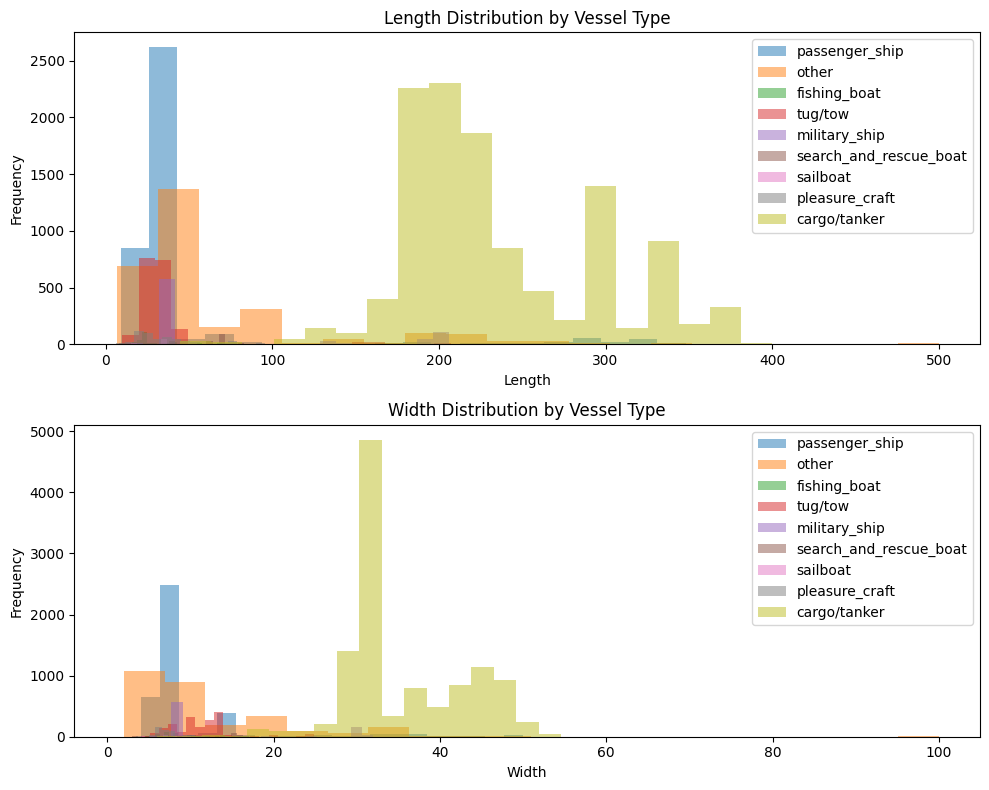

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for a vertical layout
plt.figure(figsize=(10, 8))

# Create a subplot for length
plt.subplot(2, 1, 1)
for vessel_type in ais_tracks_with_size['type_m2_agg'].unique():
    subset = ais_tracks_with_size[ais_tracks_with_size['type_m2_agg'] == vessel_type]
    plt.hist(subset['length'], bins=20, alpha=0.5, label=vessel_type)
plt.title('Length Distribution by Vessel Type')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()

# Create a subplot for width
plt.subplot(2, 1, 2)
for vessel_type in ais_tracks_with_size['type_m2_agg'].unique():
    subset = ais_tracks_with_size[ais_tracks_with_size['type_m2_agg'] == vessel_type]
    plt.hist(subset['width'], bins=20, alpha=0.5, label=vessel_type)
plt.title('Width Distribution by Vessel Type')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()